In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from joblib import parallel_backend 

# Loading the data and splitting them into train and test set


In [13]:
(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [14]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

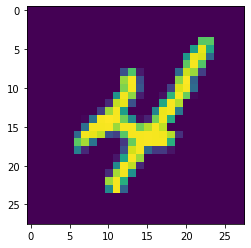

In [15]:
plt.imshow(xtrain[9])

# Training the data on 3 classifiers (SVM, KNN, Random-Forest)

## Data Preprocessing

In [16]:
#rescaling the images 
xtrain = xtrain[:7000]/255.0
xtest = xtest[:7000]/255.0
ytrain = ytrain[:7000]
ytest = ytest[:7000]
#transformrnig them data into 1 DIM
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1]*xtrain.shape[1]))

xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1]*xtest.shape[1]))

In [23]:
x = pd.DataFrame(ytrain)
pd.Series(x.value_counts())


1    784
7    754
3    716
4    716
6    709
9    695
0    691
2    675
8    650
5    610
dtype: int64

## Traning MODELS on default parameters

### SVM

In [6]:
svm_model = SVC()
svm_model.fit(xtrain,ytrain)

SVC()

### Plotting Confusion Matrix

In [7]:
y_pred = svm_model.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[663,   0,   2,   0,   0,   3,   2,   1,   1,   0],
       [  0, 784,   3,   2,   0,   1,   3,   1,   1,   0],
       [  5,   0, 688,   6,   7,   0,   5,   8,   9,   1],
       [  1,   1,   7, 661,   0,  13,   1,   9,   8,   1],
       [  1,   1,   2,   0, 673,   0,   4,   3,   0,  16],
       [  3,   1,   3,  13,   4, 593,   4,   2,   8,   2],
       [  6,   3,   3,   0,   7,   3, 631,   0,   3,   0],
       [  0,  13,  16,   2,   7,   0,   0, 655,   2,  17],
       [  6,   1,   5,  12,   8,   5,   1,   5, 635,   4],
       [  6,   6,   2,  11,  23,   3,   0,  11,   8, 649]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


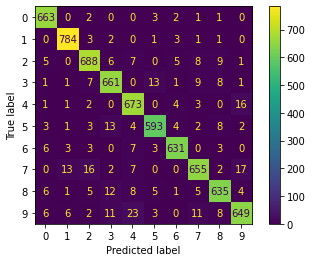

In [8]:
plot_confusion_matrix(svm_model,xtest,ytest)

In [9]:
accuracy_score(ytest,y_pred)

0.9474285714285714

# K-Neighreast Neighbours

In [10]:
knn_model = KNeighborsClassifier()
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier()

In [11]:
y_pred = knn_model.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[664,   0,   0,   0,   0,   2,   4,   1,   1,   0],
       [  0, 789,   2,   2,   1,   0,   1,   0,   0,   0],
       [  8,  25, 660,   7,   1,   0,   6,  19,   3,   0],
       [  4,   5,   4, 650,   1,  10,   3,  10,  11,   4],
       [  1,  14,   1,   0, 641,   0,   5,   3,   0,  35],
       [  5,   5,   1,  21,   6, 576,  10,   1,   3,   5],
       [  9,   6,   0,   0,   4,   2, 635,   0,   0,   0],
       [  1,  38,   1,   0,   6,   1,   0, 647,   0,  18],
       [ 13,   9,   6,  29,   8,  20,   5,   9, 565,  18],
       [  8,   9,   2,  10,  16,   2,   1,  13,   4, 654]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


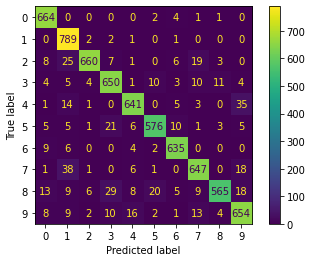

In [12]:
plot_confusion_matrix(knn_model,xtest,ytest)

In [13]:
accuracy_score(ytest,y_pred)

0.9258571428571428

In [14]:
forest_model = RandomForestClassifier()
forest_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [15]:
y_pred = forest_model.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[660,   0,   1,   0,   0,   3,   5,   1,   2,   0],
       [  0, 780,   4,   3,   1,   2,   3,   1,   1,   0],
       [  2,   1, 682,   8,   5,   2,   7,  15,   6,   1],
       [  2,   0,   8, 643,   1,  14,   1,  18,  11,   4],
       [  2,   1,   3,   1, 659,   0,   7,   1,   1,  25],
       [  5,   1,   1,  17,   5, 578,  11,   5,   5,   5],
       [  6,   3,   3,   1,  14,   5, 622,   0,   2,   0],
       [  1,   8,  20,   2,   2,   0,   0, 657,   1,  21],
       [  5,   2,   6,  13,   8,  10,   7,   6, 605,  20],
       [  3,   7,   1,  15,  17,   4,   2,   4,  16, 650]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


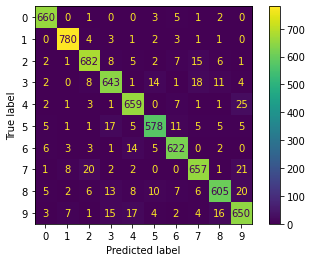

In [16]:
plot_confusion_matrix(forest_model,xtest,ytest)

In [17]:
accuracy_score(ytest,y_pred)

0.9337142857142857

In [18]:
knn_model, svm_model, forest_model

(KNeighborsClassifier(), SVC(), RandomForestClassifier())

In [19]:
#the best one performing with default parameters is the SVM with 97% of accuracy


# Applying GridSearchCV ON SVM with Early Stoppig

In [20]:
from sklearn.model_selection import GridSearchCV 

In [21]:
SVM_grid_model = GridSearchCV(SVC(), param_grid = {
    'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}, cv = 3,verbose = 3)

SVM_grid_model.fit(xtrain,ytrain)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.112 total time=  23.6s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.112 total time=  25.8s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.112 total time=  24.4s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.205 total time=  22.4s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.211 total time=  23.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.211 total time=  22.8s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.180 total time=  23.4s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.199 total time=  23.0s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.192 total time=  23.3s
[CV 1/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.851 total time=  21.6s
[CV 2/3] END ........C=1, gamma=0.1, kernel=rbf;, score=0.823 total time=  21.5s
[CV 3/3] END ........C=1, gamma=0.1, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [22]:
y_pred = SVM_grid_model.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[557,   0, 111,   0,   0,   1,   2,   0,   1,   0],
       [  0, 766,  20,   2,   2,   0,   1,   0,   4,   0],
       [  0,   0, 723,   1,   0,   0,   0,   1,   4,   0],
       [  0,   0,  85, 606,   1,   2,   0,   4,   4,   0],
       [  0,   0,  90,   0, 596,   0,   2,   2,   1,   9],
       [  0,   0, 144,  20,   2, 464,   0,   0,   3,   0],
       [  1,   1, 175,   0,   3,   3, 472,   0,   1,   0],
       [  0,   4, 116,   1,   5,   2,   0, 567,   0,  17],
       [  0,   0, 155,  17,   1,   1,   0,   0, 507,   1],
       [  0,   2,  96,  12,  30,   1,   0,   6,   4, 568]])

In [23]:
accuracy_score(ytest,y_pred)

0.8322857142857143

In [25]:
SVM_grid_model.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [28]:
knn_grid_model = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors':[i for i in range(5,13)]}, cv = 3,verbose = 3)

knn_grid_model.fit(xtrain,ytrain)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END .....................n_neighbors=5;, score=0.928 total time=   1.6s
[CV 2/3] END .....................n_neighbors=5;, score=0.937 total time=   1.3s
[CV 3/3] END .....................n_neighbors=5;, score=0.930 total time=   1.4s
[CV 1/3] END .....................n_neighbors=6;, score=0.924 total time=   1.0s
[CV 2/3] END .....................n_neighbors=6;, score=0.935 total time=   0.9s
[CV 3/3] END .....................n_neighbors=6;, score=0.928 total time=   0.9s
[CV 1/3] END .....................n_neighbors=7;, score=0.925 total time=   0.9s
[CV 2/3] END .....................n_neighbors=7;, score=0.937 total time=   0.9s
[CV 3/3] END .....................n_neighbors=7;, score=0.926 total time=   0.9s
[CV 1/3] END .....................n_neighbors=8;, score=0.922 total time=   0.9s
[CV 2/3] END .....................n_neighbors=8;, score=0.934 total time=   0.9s
[CV 3/3] END .....................n_neighbors=8;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12]},
             verbose=3)

In [31]:
y_pred = knn_grid_model.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[664,   0,   0,   0,   0,   2,   4,   1,   1,   0],
       [  0, 789,   2,   2,   1,   0,   1,   0,   0,   0],
       [  8,  25, 660,   7,   1,   0,   6,  19,   3,   0],
       [  4,   5,   4, 650,   1,  10,   3,  10,  11,   4],
       [  1,  14,   1,   0, 641,   0,   5,   3,   0,  35],
       [  5,   5,   1,  21,   6, 576,  10,   1,   3,   5],
       [  9,   6,   0,   0,   4,   2, 635,   0,   0,   0],
       [  1,  38,   1,   0,   6,   1,   0, 647,   0,  18],
       [ 13,   9,   6,  29,   8,  20,   5,   9, 565,  18],
       [  8,   9,   2,  10,  16,   2,   1,  13,   4, 654]])

In [32]:
accuracy_score(ytest,y_pred)

0.9258571428571428

In [33]:
knn_grid_model.best_params_

{'n_neighbors': 5}

In [34]:
forest_grid_model = GridSearchCV(RandomForestClassifier(), param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}, cv = 3,verbose = 3)

forest_grid_model.fit(xtrain,ytrain)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.881 total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.897 total time=   0.9s
[CV 3/3] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.893 total time=   0.9s
[CV 1/3] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.891 total time=   1.1s
[CV 2/3] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.896 total time=   1.1s
[CV 3/3] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.905 total time=   1.0s
[CV 1/3] END bootstrap=True, max_dept

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=3)

In [35]:
y_pred = forest_grid_model.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[654,   0,   0,   0,   1,   2,   7,   1,   6,   1],
       [  0, 784,   2,   2,   0,   1,   5,   0,   1,   0],
       [  6,   6, 661,  10,   6,   0,   8,  17,  15,   0],
       [  2,   5,   7, 651,   0,   2,   5,  18,   9,   3],
       [  1,   7,   1,   0, 638,   0,  14,   3,   1,  35],
       [ 11,   2,   2,  52,  12, 516,  19,   3,   8,   8],
       [ 12,   5,   1,   0,  10,   6, 621,   0,   1,   0],
       [  1,  25,  13,   2,   6,   0,   0, 635,   3,  27],
       [ 13,   6,   9,  32,  10,   6,   9,  12, 571,  14],
       [ 13,  11,   2,  13,  19,   0,   1,  11,   6, 643]])

In [36]:
accuracy_score(ytest,y_pred)

0.9105714285714286

In [38]:
forest_grid_model.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

# Voting Classifier

In [31]:
#using with the best parameters acquired from GridSearchCV
# COMBINED_ESTIMATORS = [
#                        SVC(C= 1, gamma= 0.1, kernel= 'rbf'),
#                        KNeighborsClassifier(n_neighbors= 5),
#                        RandomForestClassifier(bootstrap= True, max_depth= 110,
#                         max_features= 3, min_samples_leaf= 3, min_samples_split= 8,n_estimators= 1000)]


COMBINED_ESTIMATORS = [("SVM Classifier",SVC(C= 1, gamma= 0.1, kernel= 'rbf',probability=True)),
                       ("KNN Classifier",KNeighborsClassifier(n_neighbors= 5)),
                       ('Random Forest Classifier',RandomForestClassifier(bootstrap= True, max_depth= 110,
                        max_features= 3, min_samples_leaf= 3, min_samples_split= 8,n_estimators= 1000))]

In [33]:
soft_voter = VotingClassifier(COMBINED_ESTIMATORS,voting='soft',n_jobs = -1, verbose =3)
soft_voter.fit(xtrain,ytrain)

VotingClassifier(estimators=[('SVM Classifier',
                              SVC(C=1, gamma=0.1, probability=True)),
                             ('KNN Classifier', KNeighborsClassifier()),
                             ('Random Forest Classifier',
                              RandomForestClassifier(max_depth=110,
                                                     max_features=3,
                                                     min_samples_leaf=3,
                                                     min_samples_split=8,
                                                     n_estimators=1000))],
                 n_jobs=-1, verbose=3, voting='soft')

In [34]:
soft_voter.score(xtest,ytest)

0.9428571428571428